### Demo MNIST


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np

**Data loading**

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


**Data plotting**

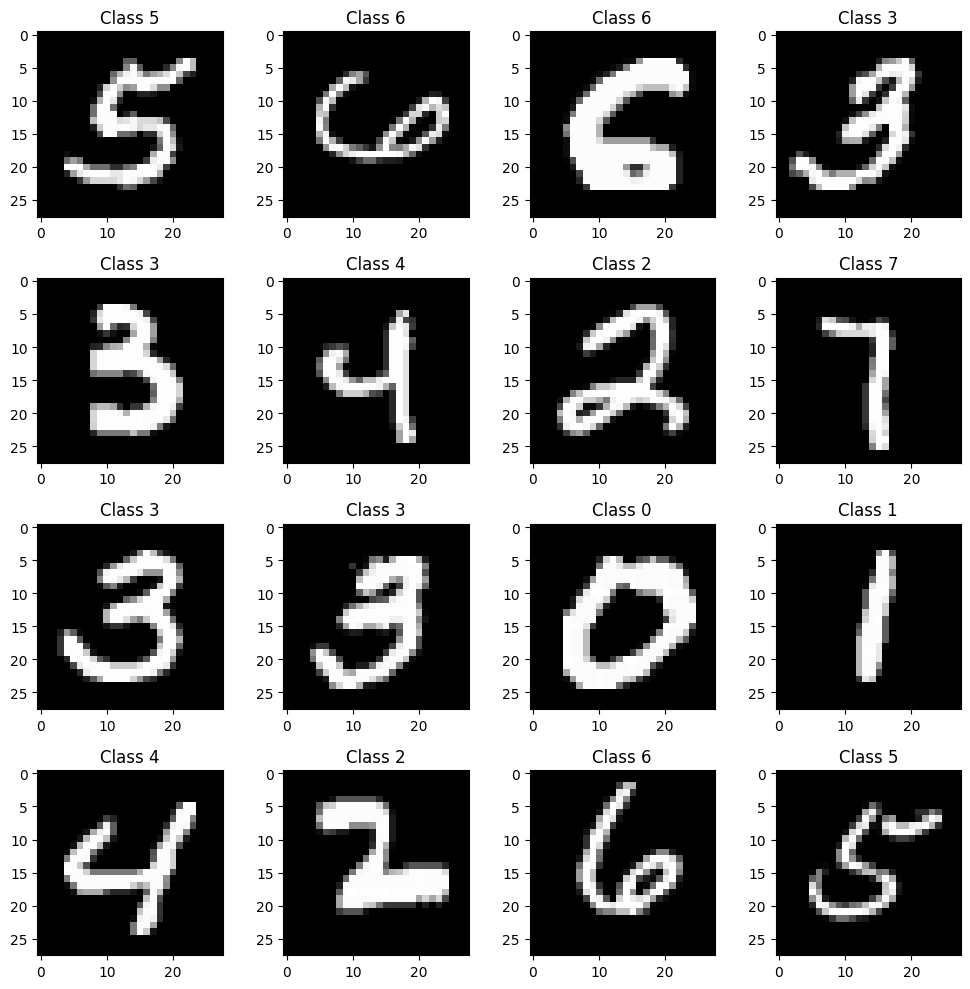

In [ ]:
fig = plt.figure()
fig.set_size_inches(10, 10)
for i in range(16):
    plt.subplot(4,4,i+1)
    num = np.random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray')
    plt.title(f"Class {y_train[num]}")

plt.tight_layout()

**Data normalization :**

We normalize the train and test data such that each pixel is in [0, 1] (instead of [0, 255]). This usually helps the training !

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
nb_classes = 10 # number of unique digits

# One hot encoding
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)
print("Y_train shape", Y_train.shape)
print("Y_test shape", Y_test.shape)

Y_train shape (60000, 10)
Y_test shape (10000, 10)


### **Fully connected network**

Create a fully connected network with :
- Two layers with 512 ouput neurons and ReLu activation.
- A final layer with 10 output neurons and a solftmax activation.

Hint : You will need to flatten your image before the first dense layer. Use [tf.keras.layers.Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)



In [ ]:
# To-do
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Train for 5 epochs :

In [ ]:
## To-do
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=128, epochs=5, validation_data = (X_test, Y_test))

Epoch 1/5
469/469 [==============================] - 8s 4ms/step - loss: 0.2194 - accuracy: 0.9343 - val_loss: 0.1057 - val_accuracy: 0.9689
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0787 - accuracy: 0.9755 - val_loss: 0.0778 - val_accuracy: 0.9749
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0505 - accuracy: 0.9843 - val_loss: 0.0718 - val_accuracy: 0.9767
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0371 - accuracy: 0.9881 - val_loss: 0.0746 - val_accuracy: 0.9784
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0291 - accuracy: 0.9904 - val_loss: 0.0735 - val_accuracy: 0.9788


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0735 - accuracy: 0.9788
Test Loss: 0.0735, Test Accuracy: 0.9788


### **Convolutional Neural Network**

Create a Convolutional Neural Network. You will need to use [tf.keras.layers.Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) between the convolutional layers and the fully connected layers.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import numpy as np

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1) # add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28, 28, 1)

###  Architecture :
- Two convolutional layers with 32 channels, ReLu activation and 3 by 3 kernels.
- 2 by 2 max pooling
- Two convolutional layers with 64 channels, ReLu activation and 3 by 3 kernels.
- 2 by 2 max pooling
- One dense layer with 512 ouput neurons and ReLu activation
- A dense layer with 10 output neurons and a solftmax activation.


In [ ]:
## To-do

# Create the neural network model
model = models.Sequential()

# First Convolutional Layer with 32 channels, ReLU activation, and 3x3 kernel
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# # Second Convolutional Layer with 32 channels, ReLU activation, and 3x3 kernel
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

# Max Pooling Layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# # Third Convolutional Layer with 64 channels, ReLU activation, and 3x3 kernel
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Fourth Convolutional Layer with 64 channels, ReLU activation, and 3x3 kernel
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Max Pooling Layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Dense Layer with 512 output neurons and ReLU activation
model.add(Dense(512, activation='relu'))

# Final Dense Layer with 10 output neurons and softmax activation for multi-class classification
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_10 (Flatten)        (None, 1600)              0         
                                                                 
 dense_14 (Dense)            (None, 512)             

Train for 5 epochs :

In [ ]:
## To-do
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=64, epochs=2, validation_data = (X_test, Y_test))

Epoch 1/2
938/938 [==============================] - 6s 5ms/step - loss: 0.0234 - accuracy: 0.9926 - val_loss: 0.0393 - val_accuracy: 0.9865
Epoch 2/2
938/938 [==============================] - 4s 5ms/step - loss: 0.0159 - accuracy: 0.9950 - val_loss: 0.0369 - val_accuracy: 0.9894


### Check predictions

Plot a few misclassified images.

313/313 [==============================] - 1s 3ms/step - loss: 0.0369 - accuracy: 0.9894
Test Loss: 0.0369, Test Accuracy: 0.9894
313/313 [==============================] - 1s 2ms/step
(array([  62,  321,  340,  359,  646,  659,  674,  691,  791,  844,  924,
        938,  947, 1039, 1112, 1178, 1226, 1232, 1242, 1260, 1319, 1378,
       1393, 1447, 1459, 1530, 1681, 1717, 1737, 1782, 1878, 1901, 1955,
       1987, 2035, 2040, 2070, 2130, 2135, 2462, 2488, 2597, 2654, 2758,
       2896, 2921, 2953, 2959, 3023, 3060, 3225, 3251, 3289, 3422, 3503,
       3520, 3559, 3662, 3727, 3762, 3780, 3808, 3906, 4176, 4205, 4256,
       4360, 4443, 4497, 4504, 4571, 4639, 4699, 4723, 4761, 4763, 4807,
       4860, 5165, 5749, 5937, 5955, 6161, 6166, 6555, 6571, 6576, 6578,
       6597, 6625, 6651, 7216, 8059, 8160, 8273, 9158, 9530, 9596, 9642,
       9664, 9679, 9729, 9792, 9839, 9850, 9982]),)
[  62  321  340  359  646  659  674  691  791  844  924  938  947 1039
 1112 1178 1226 1232 1242 1260 131

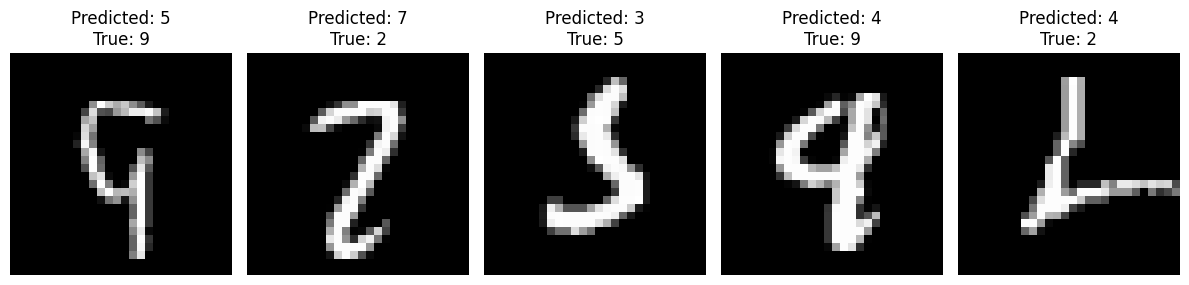

In [ ]:
## To-do
import numpy as np
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Make predictions on the test set
y_prob = model.predict(X_test) # here y_prob is a 2d matrix for all posibilities summing up to 1 for each column vector x(per sample)
y_pred = tf.argmax(y_prob, axis=-1) # for each column(/sample), we need to find out the index with the max probability, indicating the predicted class


# Find misclassified samples
misclassified_indices = np.where(y_pred != y_test)[0]
# we need [0] because we need to fetch the 1d array, not the list of arrays, use print(...)
print(np.where(y_pred != y_test))
print(misclassified_indices)

# Plot a few misclassified images
num_samples_to_plot = 5
plt.figure(figsize=(12, 8))
for i in range(min(num_samples_to_plot, len(misclassified_indices))):
    index = misclassified_indices[i]
    predicted_label = y_pred[index] # misclassified class
    true_label = y_test[index] # true class
    image = X_test[index].reshape(28, 28) * 255.0
    plt.subplot(1, min(num_samples_to_plot, len(misclassified_indices)), i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Predicted: {predicted_label}\nTrue: {true_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()
